# Лабораторная работа № 3
# Инкин Артем 6206-010302D
# Вариант 4

In [ ]:
import numpy as np
from scipy.integrate import quad
import math
from scipy.integrate import odeint
from prettytable import PrettyTable
import matplotlib.pyplot as plt

## Часть 1
$$a = -0.5$$
$$b = 0.5$$
$$f(x) = x * arccos(x)$$

### № 1
Найдите шаг интегрирования h для вычисления интеграла

$$
\int_{-0.5}^{0.5} x * arccos(x) \, dx
$$

по формуле трапеций с точностью ϵ = 0.001. Для вычисления шага воспользуйтесь формулой

$$ M = \frac{|0.5 + 0.5| * h^2}{12} < ϵ,$$

$$M = max|(x * arccos(x))''|,$$

$$x ∈ [a, b]$$

Шаг h следует выбирать с учетом доп. условия: отрезок интегрирования
должен разбиваться на число частей, кратное 4.

---
Для вычисления второй производной функции f(x) = x * arccos(x), нам нужно использовать правило производной произведения и производной обратной тригонометрической функции. Вот шаги:

Первая производная f'(x):

$$
f'(x) = \frac{d}{dx}(x \cdot \arccos(x)) = \arccos(x) - \frac{x}{\sqrt{1-x^2}}
$$

Вторая производная f''(x):

$$
f''(x) = \frac{d}{dx}\left(\arccos(x) - \frac{x}{\sqrt{1-x^2}}\right) = -\frac{1}{\sqrt{1-x^2}} - \frac{d}{dx}\left(\frac{x}{\sqrt{1-x^2}}\right)
$$

Применяем правило производной частного для второго слагаемого:

$$
f''(x) = -\frac{1}{\sqrt{1-x^2}} - \left[\frac{\sqrt{1-x^2} - x \cdot \left(-\frac{1}{2}\right) \cdot \frac{-2x}{\sqrt{1-x^2}}}{1-x^2}\right]
$$

Упрощаем выражение:

$$
f''(x) = -\frac{1}{\sqrt{1-x^2}} - \frac{1}{(1-x^2)^{\frac{3}{2}}}
$$

Окончательная форма второй производной:

$$
f''(x) = \frac{x^2 - 2}{(1-x^2)^{\frac{3}{2}}}
$$

После нахождения второй производной функции находим третью производную:

$$
f'''(x) = \frac{-4x + x^3}{(1-x^2)^{\frac{5}{2}}}
$$

и приравниваем ее к 0:

$$
\frac{-4x + x^3}{(1-x^2)^{\frac{5}{2}}} = 0
$$

откуда получаем x = 0.

Затем вычисляем значения функции f''(x) при x = 0 и на концах интервала:
$$
f''(0)=-2;
f''(-0.5)=-2.6943;
f''(0.5)=-2.6943
$$

Отсюда получаем, что $$ M = 2.6943 $$

Вычислим шаг интегрирования h:

$$
2.6943 = \frac{|0.5 - (-0.5)| \cdot h^2}{12} < 0.001
$$

$$
h^2 < \frac{0.001 \cdot 12}{2.6943}
$$

$$
h^2 < 0.004454...
$$

$$
h < \sqrt{0.004454...}
$$

$$
h < 0.06675...
$$

Выбираем h = 0.05, чтобы отрезок интегрирования делился на число частей, кратное 4.







In [ ]:
# Находим вторую производную
def second_derivative(x):
    return (-2 * np.arccos(x) + (x / np.sqrt(1 - x**2)) * (2 - x**2 / (1 - x**2)))

# Находим максимум второй производной
a, b = -0.5, 0.5
x_values = np.linspace(a, b, 1000)
max_second_derivative = max(abs(second_derivative(x)) for x in x_values)

epsilon = 0.001
h = np.sqrt(12 * epsilon / max_second_derivative)

# Отрезок должен делиться на число частей, кратное 4
n = int((b - a) / h)
if n % 4 != 0:
    n += 4 - n % 4 # увеличиваем до ближайшего числа, кратного 4
h = (b - a) / n

print("Шаг интегрирования h:", h)

Шаг интегрирования h: 0.05


### № 2
Вычислите интеграл по формуле трапеций с шагами 2h и h:

$$
\int_{-0.5}^{0.5} x * arccos(x) \, dx \approx h(\frac{y_{0}}{2} + y_{1} + y_{2} + ... + \frac{y_{n}}{2})
$$

$$
y_{i} = f(x_{i})
$$

Дайте уточненную оценку погрешности по правилу Рунге

$$
Δ \approx \frac{1}{3} |I_{n} - I_{2n}|
$$

---
Разделим интервал интегрирования [-0.5, 0.5] на 20 равных частей с шагом h = 0.05. Вычислим значения функции в точках разбиения и применим формулу трапеций:

$$
I_{h} \approx 0.05 \left( \frac{f(-0.5)}{2} + f(-0.45) + f(-0.4) + \ldots + f(0.45) + \frac{f(0.5)}{2} \right)
$$

Из чего пролучаем

$$ I_{h} \approx -0.086 $$


Разделим интервал интегрирования [-0.5, 0.5] на 10 равных частей с шагом h = 0.1 и применим формулу трапеций:

$$
I_{2h} \approx 0.1 \left( \frac{f(-0.5)}{2} + f(-0.4) + f(-0.3) + \ldots + f(0.4) + \frac{f(0.5)}{2} \right)
$$

Из чего пролучаем

$$ I_{2h} \approx -0.0874 $$


После вычисления интеграла для шагов h и 2h, оценим погрешность по правилу Рунге:

$$
Δ \approx \frac{1}{3} |-0.086 - (-0.0874)| \approx 0.00046
$$

In [ ]:
def f(x):
    return x * np.arccos(x)

# Вычисляем интеграл по формуле трапеций
def trapezoidal_rule(a, b, h, func):
    n = int((b - a) / h)
    x = np.linspace(a, b, n+1)
    y = func(x)
    integral = h * (0.5 * y[0] + np.sum(y[1:-1]) + 0.5 * y[-1])
    return integral

a, b = -0.5, 0.5
h = 0.05

# Вычисление интегралов с шагами h и 2h
integral_h = trapezoidal_rule(a, b, h, f)
integral_2h = trapezoidal_rule(a, b, 2*h, f)

# Уточненная оценка погрешности
error_estimate = abs(integral_h - integral_2h) / 3

print("Интеграл с шагом h:", integral_h)
print("Интеграл с шагом 2h:", integral_2h)
print("Уточненная оценка погрешности Δ:", error_estimate)

Интеграл с шагом h: -0.08606531911949343
Интеграл с шагом 2h: -0.08744051096108223
Уточненная оценка погрешности Δ: 0.00045839728052959883


### № 3
Вычислите интеграл по формуле Симпсона с шагами 2h и h:

$$
\int_{-0.5}^{0.5} x * arccos(x) \, dx \approx \frac{h}{3}(y_{0} + y_{2m} + 4(y_{1} + y_{3} + ... + y_{2m-1}) + 2(y_{2} + y_{4} + ... + y_{2m-2}))
$$

$$
y_{i} = f(x_{i})
$$

Дайте уточненную оценку погрешности по правилу Рунге для
формулы Симпсона:

$$
Δ \approx \frac{1}{15} |I_{n} - I_{2n}|
$$

---
Разделим интервал интегрирования [-0.5, 0.5] на 20 равных частей с шагом h = 0.05 и применим формулу Симпсона:

$$
I_{h} \approx 0.15 \left( f(-0.5) + f(0.5) + 4 \sum_{i=1,3,...}^{2m-1} x_{i} * arccos(x_{i}) + 2 \sum_{i=2,4,...}^{2m-2} x_{i} * arccos(x_{i}) \right)
$$

Из чего пролучаем

$$ I_{h} \approx -0.085607 $$


Разделим интервал интегрирования [-0.5, 0.5] на 10 равных частей с шагом h = 0.1 и применим формулу Симпсона:

$$
I_{2h} \approx \frac{1}{30} \left( f(-0.5) + f(0.5) + 4 \sum_{i=1,3,...}^{2m-1} x_{i} * arccos(x_{i}) + 2 \sum_{i=2,4,...}^{2m-2} x_{i} * arccos(x_{i}) \right)
$$

Из чего пролучаем

$$ I_{2h} \approx -0.085611 $$


После вычисления интеграла для шагов h и 2h, оценим погрешность по правилу Рунге:

$$
Δ \approx \frac{1}{15} |-0.085607 - (-0.085611)| \approx 2.6 * 10^{-7}
$$

In [ ]:
def f(x):
    return x * np.arccos(x)

# Вычисляем интеграл по формуле Симпсона
def simpson_rule(a, b, h, func):
    n = int((b - a) / h)
    if n % 2 == 1:  # проверяем что n должно быть четным числом
        n += 1
    x = np.linspace(a, b, n+1)
    y = func(x)
    integral = h/3 * (y[0] + y[-1] + 4 * np.sum(y[1:-1:2]) + 2 * np.sum(y[2:-2:2]))
    return integral

a, b = -0.5, 0.5
h = 0.05

# Вычисление интегралов с шагами h и 2h
integral_h = simpson_rule(a, b, h, f)
integral_2h = simpson_rule(a, b, 2*h, f)

# Уточненная оценка погрешности
error_estimate = abs(integral_h - integral_2h) / 15

print("Интеграл с шагом h:", integral_h)
print("Интеграл с шагом 2h:", integral_2h)
print("Уточненная оценка погрешности Δ:", error_estimate)

Интеграл с шагом h: -0.08560692183896379
Интеграл с шагом 2h: -0.08561078365206298
Уточненная оценка погрешности Δ: 2.5745420661286527e-07


### № 4
Найдите значение интеграла с помощью функций Python

$$
\int_{-0.5}^{0.5} x * arccos(x) \, dx
$$

In [ ]:
def integrand(x):
    return x * np.arccos(x)
integral_value, _ = quad(integrand, -0.5, 0.5)
print("Значение интеграла:", integral_value)

Значение интеграла: -0.08560665704653493


### № 5
Вычислите определенный интеграл по формуле Ньютона-Лейбница. (вычисления должны присутствовать в текстовом блоке). Сравните приближенные значения интеграла с точным. Какая формула численного интегрирования дала более точный результат?

---
Интегрирование по частям:

$$∫ u dv = uv - ∫ v du$$

$$u = arccos(x)$$
$$du = - \frac{1}{\sqrt{1-x^2}}$$
$$dv = xdx$$
$$v = \int x\,dx = \frac{x^2}{2}$$

$$ \frac{x^2 arccos(x)}{2} + \int \frac{x^2}{2\sqrt{1-x^2}}\,dx = \frac{x^2 arccos(x)}{2} + \frac{1}{2} \left(- \frac{x \sqrt{1-x^2}}{2} + \frac{1}{2} \cdot arcsin(x) \right) = \frac{x^2 arccos(x)}{2} + \frac{arcsin(x)}{4} - \frac{x \sqrt{1-x^2}}{4}$$

$$
\int_{-0.5}^{0.5} x * arccos(x) \, dx = \left (\frac{x^2 arccos(x)}{2} + \frac{arcsin(x)}{4} - \frac{x \sqrt{1-x^2}}{4} \right) \bigg|_{-0.5}^{0.5} \approx -0.085606657
$$

В результате можно заметить, что метод Симпсона дал более
точный результат.

---
## Часть 2 Вариант 10 (так как в моем некорректное уравнение)

Задача Коши:

$$
xy' + y = 2y^2ln(x),
$$
$$y(1) = 0.5$$
$$a = 1$$
$$b = 5$$

### № 1
Найдите шаг интегрирования h для решения задачи Коши методом Рунге-Кутта
(IV) с точностью 10^(-4)

---
Начальный шаг $h_0$ должен быть определен из двух условий:
$$h_{0}^44=ϵ$$
$$\frac{b-a}{h_0} - четно.$$

Согласно первому условию $$h_0 = \sqrt[4]{0.0001} = 0.1.$$

In [ ]:
# Определяем значение производной
def derivative(x, y):
    return (2 * y**2 * math.log(x) - y) / x

# Метод Рунге-Кутта для одного шага
def runge_kutta_step(h, x, y):
    F1 = derivative(x, y)
    F2 = derivative(x + h / 2, y + h / 2 * F1)
    F3 = derivative(x + h / 2, y + h / 2 * F2)
    x += h
    F4 = derivative(x, y + h * F3)
    y += h / 6 * (F1 + 2 * F2 + 2 * F3 + F4)
    return x, y

# Вычисляем оптимальный шаг интегрирования
def optimal_step(x0, y0, h, e, a, b):
    x1, y1 = runge_kutta_step(h, x0, y0)
    y2 = runge_kutta_step(h, x1, y1)[1]
    y2_half = runge_kutta_step(2 * h, x0, y0)[1]

    # Подбор шага
    while abs(y2 - y2_half) / 15 > e:
        h /= 2
        x1, y1 = runge_kutta_step(h, x0, y0)
        y2 = runge_kutta_step(h, x1, y1)[1]
        y2_half = runge_kutta_step(2 * h, x0, y0)[1]

    while abs(y2 - y2_half) / 15 < e:
        h *= 2
        x1, y1 = runge_kutta_step(h, x0, y0)
        y2 = runge_kutta_step(h, x1, y1)[1]
        y2_half = runge_kutta_step(2 * h, x0, y0)[1]

    # Вычисление количества шагов
    n = int((b - a) / h)
    if n % 2 == 1:
        n += 1
    h = (b - a) / n

    # Финальная проверка шага
    x1, y1 = runge_kutta_step(h, x0, y0)
    y2 = runge_kutta_step(h, x1, y1)[1]
    y2_half = runge_kutta_step(2 * h, x0, y0)[1]
    while abs(y2 - y2_half) / 15 > e:
        n += 2
        h = (b - a) / n
        x1, y1 = runge_kutta_step(h, x0, y0)
        y2 = runge_kutta_step(h, x1, y1)[1]
        y2_half = runge_kutta_step(2 * h, x0, y0)[1]

    return h

x0 = 1
y0 = 0.5
a = 1
b = 5
e = 0.00001
h0 = 0.1
h = optimal_step(x0, y0, h0, e, a, b)

print("Оптимальный шаг интегрирования:", h)

Оптимальный шаг интегрирования: 0.25


### № 2
Найти решение задачи Коши на отрезке [a, b] методом Рунге-Кутта (IV) с
точностью до 10(-4)

In [ ]:
def runge_kutta(a, b, y0, h):
  x_args = [a]
  y_run = [y0]
  x = a
  y = y0
  while (abs(x - b) > 0.0001):
    x, y = runge_kutta_step(h, x, y)
    x_args.append(x)
    y_run.append(y)
  return x_args, y_run

x_args, y_run = runge_kutta(a, b, y0, h)
y_tilda = runge_kutta(a, b, y0, 2 * h)[1]

delta = []
for i in range(0, len(y_run), 2):
  delta.append(abs(y_run[i] - y_tilda[i // 2]) / 15)

x_args_table = ['{:.5f}'.format(value) for value in x_args]
y_run_table = ['{:.5f}'.format(value) for value in y_run]
y_tilda = ['{:.5f}'.format(value) for value in y_tilda]
delta = ['{:.5f}'.format(value) for value in delta]
for i in range(1, len(y_run), 2):
  y_tilda.insert(i, '')
  delta.insert(i, '')

table = PrettyTable()
table.add_column('x', x_args_table)
table.add_column('y', y_run_table)
table.add_column('y_tilda', y_tilda)
table.add_column('delta', delta)
print(table)

+---------+---------+---------+---------+
|    x    |    y    | y_tilda |  delta  |
+---------+---------+---------+---------+
| 1.00000 | 0.50000 | 0.50000 | 0.00000 |
| 1.25000 | 0.40877 |         |         |
| 1.50000 | 0.35574 | 0.35561 | 0.00001 |
| 1.75000 | 0.32058 |         |         |
| 2.00000 | 0.29530 | 0.29516 | 0.00001 |
| 2.25000 | 0.27609 |         |         |
| 2.50000 | 0.26091 | 0.26078 | 0.00001 |
| 2.75000 | 0.24855 |         |         |
| 3.00000 | 0.23824 | 0.23811 | 0.00001 |
| 3.25000 | 0.22949 |         |         |
| 3.50000 | 0.22194 | 0.22180 | 0.00001 |
| 3.75000 | 0.21534 |         |         |
| 4.00000 | 0.20952 | 0.20938 | 0.00001 |
| 4.25000 | 0.20433 |         |         |
| 4.50000 | 0.19966 | 0.19952 | 0.00001 |
| 4.75000 | 0.19544 |         |         |
| 5.00000 | 0.19160 | 0.19146 | 0.00001 |
+---------+---------+---------+---------+


### № 3
Найти решение задачи Коши на отрезке [a, b] методом Эйлера

In [ ]:
x = a
y = y0
y_euler = [y0]
while (abs(x - b) > 0.0001):
  y += derivative(x, y) * h
  x += h
  y_euler.append(y)

### № 4
Найти решение задачи Коши с помощью функций Python

In [ ]:
def func(y, x):
    return (2 * y**2 * math.log(x) - y) / x
y_py = odeint(func, y0, x_args).flatten()

### Таблица с результатами численных методов и питона

In [ ]:
y_euler_table = ['{:.5f}'.format(value) for value in y_euler]
y_py_table = ['{:.5f}'.format(value) for value in y_py]

table = PrettyTable()
table.add_column('x', x_args_table)
table.add_column('Runge Kutta', y_run_table)
table.add_column('Euler', y_euler_table)
table.add_column('Python', y_py_table)
print(table)

+---------+-------------+---------+---------+
|    x    | Runge Kutta |  Euler  |  Python |
+---------+-------------+---------+---------+
| 1.00000 |   0.50000   | 0.50000 | 0.50000 |
| 1.25000 |   0.40877   | 0.37500 | 0.40878 |
| 1.50000 |   0.35574   | 0.31255 | 0.35575 |
| 1.75000 |   0.32058   | 0.27366 | 0.32059 |
| 2.00000 |   0.29530   | 0.24654 | 0.29531 |
| 2.25000 |   0.27609   | 0.22626 | 0.27610 |
| 2.50000 |   0.26091   | 0.21034 | 0.26092 |
| 2.75000 |   0.24855   | 0.19742 | 0.24856 |
| 3.00000 |   0.23824   | 0.18664 | 0.23825 |
| 3.25000 |   0.22949   | 0.17746 | 0.22950 |
| 3.50000 |   0.22194   | 0.16952 | 0.22195 |
| 3.75000 |   0.21534   | 0.16256 | 0.21535 |
| 4.00000 |   0.20952   | 0.15638 | 0.20953 |
| 4.25000 |   0.20433   | 0.15084 | 0.20434 |
| 4.50000 |   0.19966   | 0.14584 | 0.19967 |
| 4.75000 |   0.19544   | 0.14129 | 0.19545 |
| 5.00000 |   0.19160   | 0.13713 | 0.19161 |
+---------+-------------+---------+---------+


### № 5
Найти точное решение задачи Коши

---
$$
xy'+y=2\,\ln\left(x\right)\,{y}^{2}
$$

Делим обе части уравнения на $x$:
$$y'+\dfrac{y}{x}=\dfrac{2\,\ln\left(x\right)\,{y}^{2}}{x}$$

Делим обе части уравнения на $y^2$:
$$\dfrac{y'}{{y}^{2}}+\dfrac{1}{x\,y}=\dfrac{2\,\ln\left(x\right)}{x}$$

Подстановка:
$$
\left| u = \frac {1}{y} => u' = -\frac {y'}{y^2} \right|
\left| y = \frac {1}{u} => y' = -u'y^2 \right|
$$

Подставляем и делим на -1:
$$u'-\dfrac{u}{x}=-\dfrac{2\,\ln\left(x\right)}{x}$$

Подстановка:
$$
\left| u = tv => u' = tv' + t'v \right|
$$

$$t\,v'+t'\,v-\dfrac{t\,v}{x}=-\dfrac{2\,\ln\left(x\right)}{x}$$

Сгруппируем:
$$t\,v'+v\,\left({t'-\dfrac{t}{x}}\right)=-\dfrac{2\,\ln\left(x\right)}{x}$$

Вычислим первое уравнение:
$$t'-\dfrac{t}{x}=0$$

$$t'=\dfrac{t}{x}$$

$$\dfrac{\mathrm{d}t}{\mathrm{d}x}=\dfrac{t}{x}$$

$$\dfrac{\mathrm{d}t}{t}=\dfrac{\mathrm{d}x}{x}$$

$$\int{\dfrac{1}{t}}{\;\mathrm{d}t}=\int{\dfrac{1}{x}}{\;\mathrm{d}x}$$

$$\ln\left(t\right)=\ln\left(x\right)$$

$$t=x$$

Вычислим второе уравнение:
$$v'\,{t}+v\,{\left(t'-\dfrac{t}{x}\right)}=-\dfrac{2\,\ln\left(x\right)}{x}$$
при ${t}=x$ и ${\left(t'-\dfrac{t}{x}\right)}=0$

$$v'\,x=-\dfrac{2\,\ln\left(x\right)}{x}$$

Делим обе части на $x$:
$$v'=-\dfrac{2\,\ln\left(x\right)}{{x}^{2}}$$

$$\dfrac{\mathrm{d}v}{\mathrm{d}x}=-\dfrac{2\,\ln\left(x\right)}{{x}^{2}}$$

Умножаем обе части на $dx$:
$$\mathrm{d}v=-\dfrac{2\,\ln\left(x\right)\,\mathrm{d}x}{{x}^{2}}$$

$$\int{1}{\;\mathrm{d}v}=\int{-\dfrac{2\,\ln\left(x\right)}{{x}^{2}}}{\;\mathrm{d}x}$$

$$v=\dfrac{2\,\ln\left(x\right)}{x}+\dfrac{2}{x}+C(x)$$

Обратная замена $v= \frac{u}{t}$, $t=x$:
$$u=2\,\ln\left(x\right)+2+C(x)$$

Обратная замена $u=\frac{1}{y}$:
$$\dfrac{1}{y}=2\,\ln\left(x\right)+2+C(x)$$

$$y=\dfrac{1}{2\,\ln\left(x\right)+2+C(x)}$$

Найдем C:
$$ y(1) = \frac{1}{2} => C=0$$

Решение уравнения:
$$y=\dfrac{1}{2\,\ln\left(x\right)+2}$$

In [ ]:
def real(x):
  return 1 / (2 * np.log(x) + 2)

y_real = real(x_args);
y_real_table = ['{:.5f}'.format(value) for value in y_real]

table = PrettyTable()
table.add_column('x', x_args_table)
table.add_column('y_real', y_real_table)
print(table)

+---------+---------+
|    x    |  y_real |
+---------+---------+
| 1.00000 | 0.50000 |
| 1.25000 | 0.40878 |
| 1.50000 | 0.35575 |
| 1.75000 | 0.32059 |
| 2.00000 | 0.29531 |
| 2.25000 | 0.27610 |
| 2.50000 | 0.26092 |
| 2.75000 | 0.24856 |
| 3.00000 | 0.23825 |
| 3.25000 | 0.22950 |
| 3.50000 | 0.22195 |
| 3.75000 | 0.21535 |
| 4.00000 | 0.20953 |
| 4.25000 | 0.20434 |
| 4.50000 | 0.19967 |
| 4.75000 | 0.19545 |
| 5.00000 | 0.19161 |
+---------+---------+


### Интегральные кривые всех вычислений

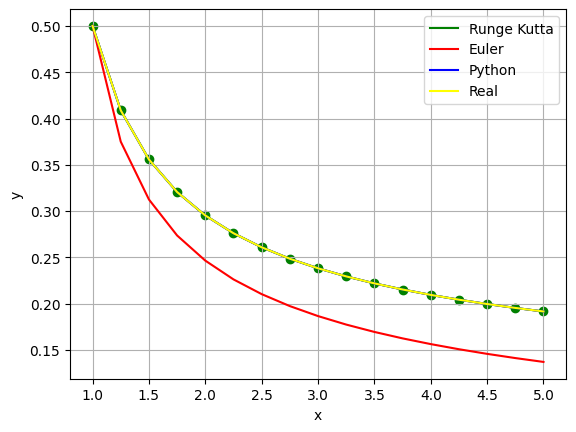

In [ ]:
plt.plot(x_args, y_run, label='Runge Kutta', color='green')
plt.scatter(x_args, y_run, color='green')
plt.plot(x_args, y_euler, label='Euler', color='red')
plt.plot(x_args, y_py, label='Python', color='blue')
plt.plot(x_args, y_real, label='Real', color='yellow')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

### № 6
Найти максимум модуля отклонений в узловых точках приближенного решения от точного

In [ ]:
max_runge_kutta, max_euler = 0,0

for i in range (len(x_args)):
  if(abs(real(x_args[i]) - y_run[i]) > max_runge_kutta):
     max_runge_kutta = abs(real(x_args[i]) - y_run[i])

  if(abs(real(x_args[i]) - y_euler[i]) > max_euler):
    max_euler = abs(real(x_args[i]) - y_euler[i])

print(max_runge_kutta, max_euler)

1.3163180450720402e-05 0.05448071844299657
